In [26]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [27]:
# Read data and standardize
df = pd.read_csv('europe.csv')
x=df.iloc[:,1:8]
x=StandardScaler().fit_transform(x)
labels = ["Area","GDP","Inflation","Life.expect","Military","Pop.growth","Unemployment"]

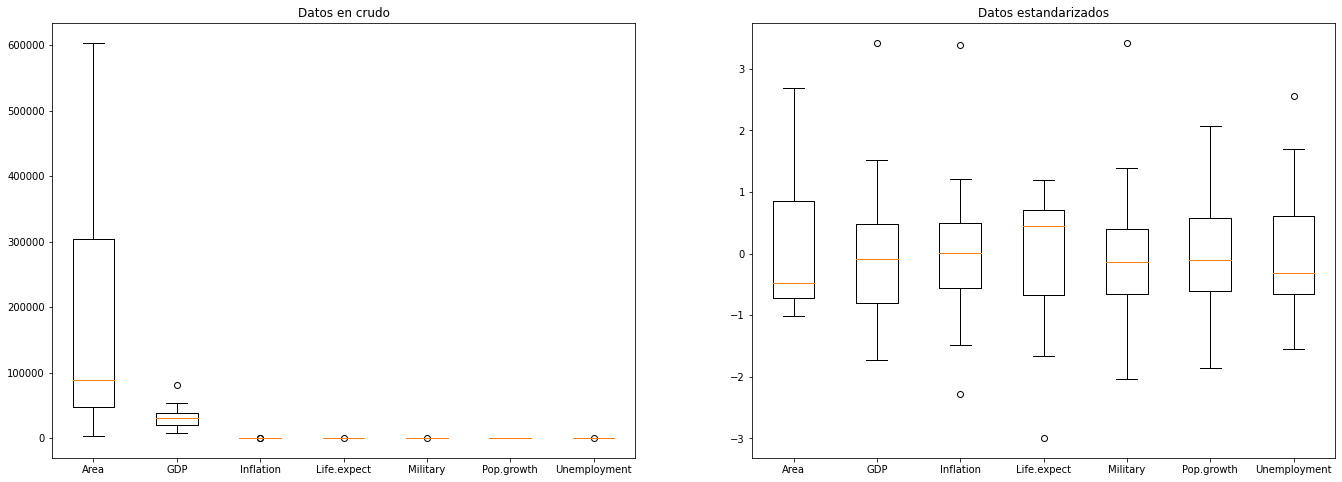

In [28]:
# Boxplots of normalized data before and after
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(23, 8))

ax[0].boxplot(df.iloc[:,1:8])
ax[0].set_xticks([1, 2, 3, 4, 5, 6, 7], labels)
ax[0].set_title("Datos en crudo")

ax[1].boxplot(x)
ax[1].set_xticks([1, 2, 3, 4, 5, 6, 7], labels)
ax[1].set_title("Datos estandarizados")
plt.show()

In [29]:
# First run to get the best number of components to use
pca=PCA(n_components=7)
PC = pca.fit_transform(x)
eigenvalues = pca.explained_variance_

print("Autovalores: {}".format(eigenvalues))

n_components = 7
for i in range(len(eigenvalues)):
    if sum(eigenvalues[:i+1])/sum(eigenvalues)>=0.95 and n_components > i+1:
        n_components=i+1
        break

Autovalores: [3.34669033 1.23109094 1.10256796 0.79888768 0.47480597 0.17492107
 0.13029529]


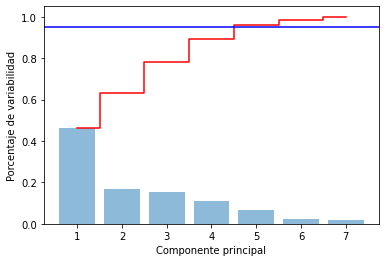

In [30]:
tot = sum(eigenvalues)
var_exp = [(i / tot) for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,8), var_exp, alpha=0.5, align='center')
plt.step(range(1,8), cum_var_exp, where='mid',color='red')
plt.axhline(y=0.95, color='b', linestyle='-')
plt.ylabel('Porcentaje de variabilidad')
plt.xlabel('Componente principal')
plt.show()

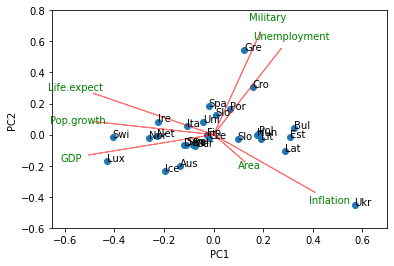

In [31]:
score = PC[:,0:2]
coeff = np.transpose(pca.components_[0:2, :])
xs = score[:,0]
ys = score[:,1]
n = coeff.shape[0]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())
plt.scatter(xs * scalex,ys * scaley)
for i in range(len(xs)):
    plt.annotate(df.iloc[i]['Country'][0:3], (xs[i]* scalex, ys[i]* scaley))

for i in range(n):
    plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
    plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-0.65,0.7)
plt.ylim(-0.6,0.8)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [32]:
# Get the Yi functions
pca=PCA(n_components=n_components)
PC = pca.fit_transform(x)
principalDF=pd.DataFrame(data=PC,columns=['pc'+str(i) for i in range(1,n_components+1)])
finalDf = pd.concat([principalDF, df[['Country']]], axis = 1)
PCloadings = pca.components_.T * np.sqrt(pca.explained_variance_)
components=df.columns.tolist()
components=components[1:8]
loadingdf=pd.DataFrame(PCloadings,columns=('Y'+str(i) for i in range(1,n_components+1)))
loadingdf["Variable"]=components
print(loadingdf)

         Y1        Y2        Y3        Y4        Y5      Variable
0  0.228444 -0.191810  0.943241  0.040088 -0.223268          Area
1 -0.915623 -0.144396  0.088156 -0.075308  0.269170           GDP
2  0.743683 -0.410151  0.208111  0.147197  0.475108     Inflation
3 -0.883367  0.294304  0.258395  0.023928 -0.070137   Life.expect
4  0.344131  0.730377  0.255871 -0.502654  0.253676      Military
5 -0.870250  0.091673  0.171887  0.350785  0.239702    Pop.growth
6  0.496966  0.613805  0.000525  0.627423  0.007000  Unemployment


In [33]:
for i in range(len(loadingdf['Y1'])):
    if loadingdf.iloc[i]['Y1'] > 0:
        print("{} -> {} tiene una correlación POSITIVA".format(loadingdf.iloc[i]['Y1'], loadingdf.iloc[i]['Variable']))
    else:
        print("{} -> {} tiene una correlación NEGATIVA".format(loadingdf.iloc[i]['Y1'], loadingdf.iloc[i]['Variable']))

0.22844383730607493 -> Area tiene una correlación POSITIVA
-0.9156234985802528 -> GDP tiene una correlación NEGATIVA
0.7436827540131491 -> Inflation tiene una correlación POSITIVA
-0.8833666101945948 -> Life.expect tiene una correlación NEGATIVA
0.3441306694199033 -> Military tiene una correlación POSITIVA
-0.870250257903944 -> Pop.growth tiene una correlación NEGATIVA
0.4969661158444337 -> Unemployment tiene una correlación POSITIVA


In [34]:
scores = {}
for i in range(len(x)):
    aux = 0
    for j in range(len(x[i])):
        aux += loadingdf.iloc[j]['Y1'] * x[i][j]
    scores[df.iloc[i]['Country']] = aux
scores = dict(sorted(scores.items(), key=lambda item: item[1]))
for i, key in enumerate(scores):
    print("{}. {}: {}".format(i+1, key, scores[key]))

1. Luxembourg: -6.363435575109162
2. Switzerland: -6.003321083995641
3. Norway: -3.853642843624795
4. Netherlands: -3.366186645344117
5. Ireland: -3.3092269429114385
6. Iceland: -2.8972507524483215
7. Austria: -1.9789450245042306
8. Denmark: -1.7474223824795165
9. Sweden: -1.6192082603987739
10. Italy: -1.560884645945077
11. Belgium: -1.2459908781638986
12. Germany: -1.0837226777009388
13. United Kingdom: -0.6234936135694673
14. Finland: -0.3852034310510022
15. Czech Republic: -0.30589240693767156
16. Spain: -0.29959464304460703
17. Slovenia: 0.12356359199531727
18. Portugal: 0.9631648886321195
19. Slovakia: 1.4323549459725622
20. Greece: 1.8302595626856797
21. Croatia: 2.32360543444865
22. Hungary: 2.5554804183536954
23. Poland: 2.6924573981749336
24. Lithuania: 2.7991589095829026
25. Latvia: 4.218696241731397
26. Estonia: 4.551053271190965
27. Bulgaria: 4.774502301709731
28. Ukraine: 8.379124842750839
